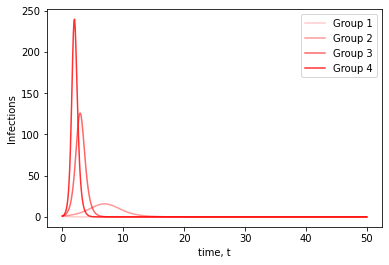

In [117]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000
gamma = 3
c = 1.8
dt = 0.1 
T = 50
#t = np.arange(0,50,0.1)
p = np.array([1, 2, 3, 4])

S0 = 999
I0 = 1

S = np.zeros((4, int(T/dt) + 1))
I = np.zeros((4, int(T/dt) + 1))
R = np.zeros((4, int(T/dt) + 1))

S[:, 0] = S0
I[:, 0]  = I0
R[:, 0] = R0

def sir_deriv(S, I, R, c, p, gamma, dt):
    dSdt = -c * p * S * I / N
    dIdt = c * p * S * I / N - gamma * I
    dRdt = gamma * I
    St = S + dSdt * dt
    It = I + dIdt * dt
    Rt = R + dRdt * dt
    return St, It, Rt


for t in range(1, int(T/dt) + 1):
    S[:, t], I[:, t], R[:,t] = sir_deriv(S[:, t-1], I[:, t-1], R[:,t-1], c, p, gamma, dt)

t = np.linspace(0, T, int(T/dt) + 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(t, I[0, :], 'r', alpha=0.2,label='Group 1')
plt.plot(t, I[1, :], 'r', alpha=0.4,label='Group 2')
plt.plot(t, I[2, :], 'r', alpha=0.6,label='Group 3')
plt.plot(t, I[3, :], 'r', alpha=0.8,label='Group 4')
plt.ylabel('Infections')
plt.xlabel('time, t')
plt.legend(["Group 1","Group 2","Group 3", "Group 4"],loc='upper right');
plt.show()


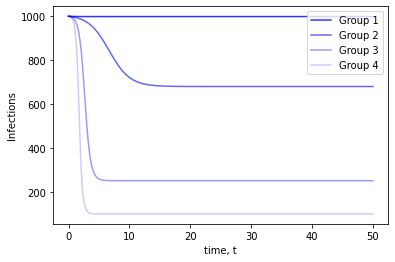

In [95]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(t, S[0, :], 'b', alpha=0.8,label='Group 1')
plt.plot(t, S[1, :], 'b', alpha=0.6,label='Group 2')
plt.plot(t, S[2, :], 'b', alpha=0.4,label='Group 3')
plt.plot(t, S[3, :], 'b', alpha=0.2,label='Group 4')
plt.ylabel('Infections')
plt.xlabel('time, t')
plt.legend(["Group 1","Group 2","Group 3", "Group 4"],loc='upper right');
plt.show()


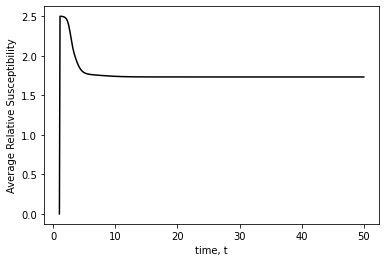

In [116]:
num = 0
dem = 0
p_vals = [0]
for t in range(1, int(T/dt) + 1):
    num = np.sum(p * S[:, t])
    dem = np.sum(S[:, t])
    p_avg = num / dem
    
    p_vals.append(p_avg)
    
t = np.linspace(1, T, int(T/dt) + 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(t, p_vals, 'black')
plt.xlabel("time, t")
plt.ylabel("Average Relative Susceptibility")
plt.show()

In [118]:
import numpy as np
from scipy.stats import nbinom

def nb_draws(k,R0, size):
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    draw = nbinom.rvs(n=n,p=p)
    draws = nbinom.rvs(n=n,p=p,size=size)
    return draws

def sim_epidemic(R0, k, G, num_sims):
    die_count = 0
    for _ in range(num_sims):
        infections = [1]  # Start with a single infection
        for _ in range(G):
            new_infections = nb_draws(R0, k, np.size(infections))
            infections = np.sum(new_infections)
            if infections == 0:  # epidemic dies
                die_count += 1
                break
    return die_count / num_sims

R0 = 3
k_values = [0.1, 0.5, 1.0, 5.0, 10.0]
generations = 10
num_sims = 10000

print("R0 \t k \t Prob. of Epidemic Dying Out")
for k in k_values:
    probability = sim_epidemic(R0, k, generations, num_sims)
    print(f"{R0}\t{k}\t{probability:.3f}")


R0 	 k 	 Prob. of Epidemic Dying Out
3	0.1	1.000
3	0.5	1.000
3	1.0	0.996
3	5.0	0.426
3	10.0	0.120
